# Section10 非線形回帰

## 多項式特徴量

多項式特徴量
- sklearn.preprocessinf.PolynomialFeatures
    1. PolynomialFeatures(degree)でインスタンス生成
        - degreeは多項式回帰の次数のこと
    2. .fit_transform(X)で多項式特徴量に変換
    3. 変換後のXをmodel.fit(X,y)で線形回帰を学習
    4. バイアス項も作られるのでinclud_bias=Falseを指定

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

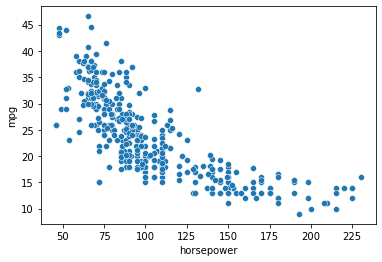

In [1]:
import numpy as np
import seaborn as sns
df = sns.load_dataset('mpg') # mile per gallon（燃費）

df.dropna(inplace=True)
X = df['horsepower'].values.reshape(-1, 1) # horsepower:馬力
y = df['mpg']  # mpg:燃費

sns.scatterplot(x=df['horsepower'], y=df['mpg'])

In [2]:
# 多項式特徴量
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
poly.fit(X)
X_poly = poly.transform(X)

In [3]:
# 線形回帰
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

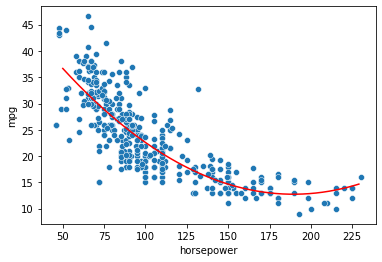

In [4]:
# 描画
import matplotlib.pyplot as plt

x_axis = np.arange(50, 230).reshape(-1, 1)
x_axis_ = poly.fit_transform(x_axis)
pred = model.predict(x_axis_)

sns.scatterplot(x=df['horsepower'], y=df['mpg'])
plt.plot(x_axis, pred, 'r')

In [5]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [6]:
X.shape

(392, 1)

## 線形回帰 vs 非線形

Challenge
- horcepowerからmpgを予測するモデルを作成
    - degree=1 (線形回帰)
    - degree=2
    - degree=3
- 5k-Foldを三回繰り返し汎化性能を比較
- 評価指標はMSEを使用

In [7]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [8]:
from sklearn.model_selection import cross_val_score, RepeatedKFold

X = df['horsepower'].values.reshape(-1, 1)
y = df['mpg']
degrees = [1, 2, 3]
model = LinearRegression()
k = 5
n_repeats = 3
cv = RepeatedKFold(n_splits=k, n_repeats=n_repeats, random_state=0)
results = {}

for d in degrees:
    poly = PolynomialFeatures(d)
    X_poly = poly.fit_transform(X)
    scores = cross_val_score(model, X_poly, y, scoring='neg_mean_squared_error', cv=cv)
    results[f'degress {d}'] = {'scores_mean': -np.mean(scores), 'scores_std':np.std(scores)}

In [9]:
# 結果：　非線形の方がMSE低く精度が高い

import pandas as pd
pd.DataFrame(results)

,degress 1,degress 2,degress 3
scores_mean,24.235392,19.294970,19.433812
scores_std,3.346678,4.413627,4.508224


In [10]:
# Pipelineを使ってもう少しスッキリとコードを書く
# 不要コードをコメントアウトしている

from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.pipeline import Pipeline

X = df['horsepower'].values.reshape(-1, 1)
y = df['mpg']
degrees = [1, 2, 3]
# model = LinearRegression()
k = 5
n_repeats = 3
cv = RepeatedKFold(n_splits=k, n_repeats=n_repeats, random_state=0)
results = {}

for d in degrees:
#     poly = PolynomialFeatures(d)
#     X_poly = poly.fit_transform(X)
    pipeline = Pipeline(steps=[('poly', PolynomialFeatures(d)), ('model', LinearRegression())])
    scores = cross_val_score(pipeline, X, y, scoring='neg_mean_squared_error', cv=cv)
    results[f'degress {d}'] = {'scores_mean': -np.mean(scores), 'scores_std':np.std(scores)}

In [11]:
pd.DataFrame(results)

,degress 1,degress 2,degress 3
scores_mean,24.235392,19.294970,19.433812
scores_std,3.346678,4.413627,4.508224


## kNN回帰

kNN回帰
- sklearn.neighbors.KNeighborRegressor
    1. KNeighborRegression(n_neighbors)でインスタンス生成
    2. .fit(X)で学習
    3. .predict(X)で予測

In [31]:
from sklearn.model_selection import train_test_split

<AxesSubplot:ylabel='mpg'>

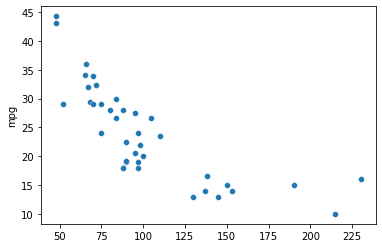

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=0)
sns.scatterplot(x=X_train[:, 0], y=y_train)

In [42]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [43]:
y_pred = model.predict(X_test)

Text(0.5, 0, 'horscepower')

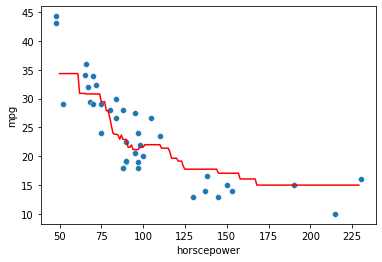

In [44]:
x_axis = np.arange(50, 230).reshape(-1, 1)
y_pred = model.predict(x_axis)
sns.scatterplot(x=X_train[:, 0], y=y_train)
plt.plot(x_axis, y_pred, 'r')
plt.xlabel('horscepower')

## 様々なkでkNN回帰

- horcepowerからmpgを予測するモデルを作成
    - k=1~30
- 5k-Foldを三回繰り返し汎化性能を比較
- 評価指標はMSEを使用
- kを増加したときのMSEの推移をplot

In [57]:
X = df['horsepower'].values.reshape(-1, 1)
y = df['mpg']
k = 5
n_neighbors = np.arange(1, 31)
n_repeats = 3
cv = RepeatedKFold(n_splits=k, n_repeats=n_repeats, random_state=0)
score_list = []
score_std_list = []

for n in n_neighbors:
    model = KNeighborsRegressor(n_neighbors=n)
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv)
    score_list.append(-np.mean(scores))
    score_std_list.append(np.std(scores))

Text(0, 0.5, '5Fold CV Error (MSE)')

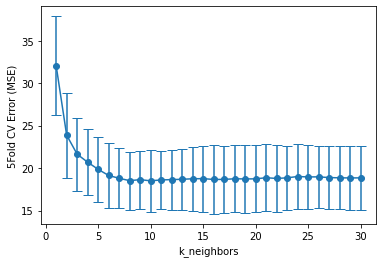

In [64]:
# plt.plot(n_neighbors, score_list)
plt.errorbar(n_neighbors, score_list, yerr=score_std_list, fmt='-o', capsize=5)
plt.xlabel('k_neighbors')
plt.ylabel('5Fold CV Error (MSE)')

In [67]:
print(f'Best performance: k={n_neighbors[np.argmin(score_list)]}, cv error={np.min(score_list)}')

Best performance: k=10, cv error=18.509221851130587
